Animal State Prediction
----->The Data contains the information of Animal Welfare Center that provides the shelter to various animals.
from this notebook helps to analyze and predict the status of animal after their recovery. 

In [1]:
#importing all python libraries 
import pandas as pd
import seaborn as sns
import re
%matplotlib inline

In [2]:
#reading the train data
train_df = pd.read_csv("C:/Users/123/Desktop/animal_state_prediction/data/train.csv")

In [3]:
# checking for null values in each features
def num_missing(x):
    return sum(x.isnull())
train_df.apply(num_missing, axis=0)

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

In [4]:
#fill null values with most commom value in feature
train_df["sex_upon_outcome"] = train_df.sex_upon_outcome.fillna("Neutered Male")

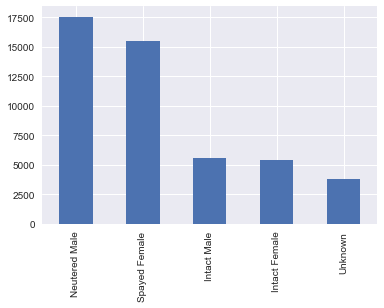

In [5]:
#plotting the counts of values in sex_upon_outcome
train_df["sex_upon_outcome"].value_counts().plot(kind = "bar")

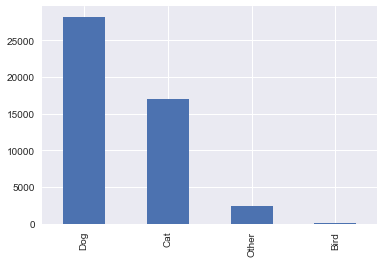

In [6]:
##plotting the counts of values in animal_type
train_df["animal_type"].value_counts().plot(kind = "bar")

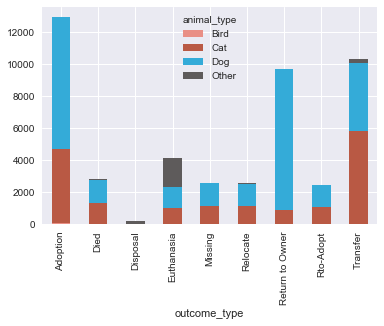

In [7]:
train_df[['animal_type','outcome_type']].groupby(['outcome_type','animal_type']).size().unstack().plot(kind='bar',color=['#E98F85','#B95944','#34ABD8','#5E5B5B'],stacked=True)

using sex_upon_outcome feature two new features found by dividing into Male , Female and Unknown category and Neutered and Intact is important feature for pet animal. So finding either pet animal is Neutered,Intact ,Unknown. By plotting the graph with outcome_type we can thier significant factor in determining shelter animal outcomes.


In [8]:
gender_list = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
train_df['sex'] = train_df.sex_upon_outcome.map(gender_list)
neutered_list = {'Neutered Male':'Neutered','Spayed Female':'Neutered','Intact Male':'Intact','Intact Female':'Intact','Unknown':'Unknown'}
train_df['Neutered'] = train_df.sex_upon_outcome.map(neutered_list)

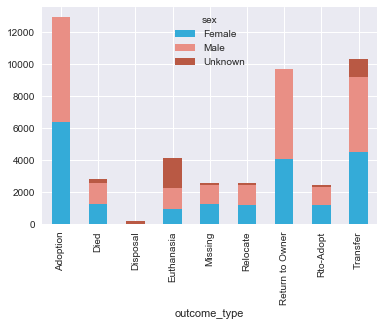

In [9]:
train_df[['sex','outcome_type']].groupby(['outcome_type','sex']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944','#5E5B5B'],stacked=True)
#AnimalType.plot(kind='bar',color=['#34ABD8','#E98F85','#B95944','#5E5B5B'],stacked=True)

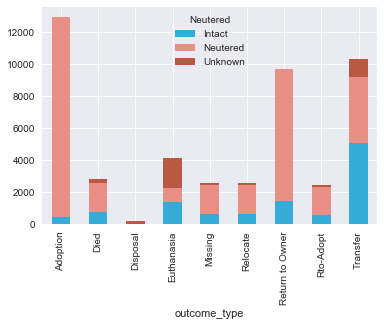

In [10]:
train_df[['Neutered','outcome_type']].groupby(['outcome_type','Neutered']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944','#5E5B5B'],stacked=True)

From intake_hour tried to find time of day pet is bring to welfare center by diving the time into three categories "Morning" , "afternoon" , "evening" ,"night"  which may be significant feature in determining the outcome for animal

In [11]:
def get_time_of_day(hour):
    if hour > 5 and hour < 12:
        return "morning"
    elif hour > 11 and hour < 16:
        return "afternoon"
    elif hour > 15 and hour < 20:
        return "evening"
    else:
        "night"

In [12]:
train_df["time_of_day"] = train_df["intake_hour"].apply(get_time_of_day)

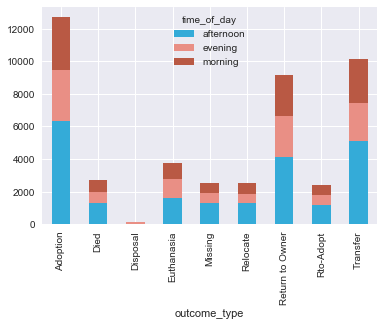

In [13]:
train_df[['time_of_day','outcome_type']].groupby(['outcome_type','time_of_day']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944'],stacked=True)

##from age_upon_outcome: Age of animal in years and days calculated. From age variable different stages of life like baby, adult , old can be categorize which results into importaant feature in predicting the result. 

In [14]:
train_df['age_upon_outcome_time']= train_df['age_upon_outcome'].str.split(' ').str.get(1) #split the data 
train_df['age_upon_outcome_time']=train_df['age_upon_outcome_time'].replace(['year', 'years', 'week', 'weeks', 'month','months', 'days','day'], [365, 365, 7, 7,30.5, 30.5, 1,1]) 

In [15]:
train_df['age_upon_outcome_age']= train_df['age_upon_outcome'].str.split(' ').str.get(0).fillna(0).astype(float)
train_df['age_in_days']= train_df['age_upon_outcome_age']* train_df['age_upon_outcome_time']
train_df['age_in_years']= train_df['age_in_days']/365

In [16]:
import seaborn as sns

In [17]:
def get_lifestage_range(x):
    if x <= 1.5:
        return 'baby'
    elif 1.5 < x <= 7 :
        return 'adult'
    else:
        return 'senior'
    
train_df['life_stage_range'] = train_df.age_in_years.apply(get_lifestage_range)


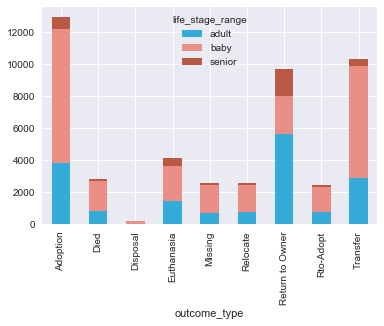

In [18]:
train_df[['life_stage_range','outcome_type']].groupby(['outcome_type','life_stage_range']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944'],stacked=True)

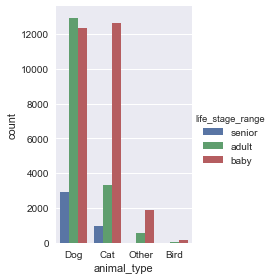

In [19]:
sns.factorplot(x="animal_type", hue="life_stage_range", data=train_df, kind="count",
                    size=4, aspect=.7)

In [20]:
dogs = train_df.loc[(train_df['animal_type']=='Dog' )]
cats = train_df.loc[(train_df['animal_type']=='Cat')]
birds = train_df.loc[(train_df['animal_type']=='birds')]
other = train_df.loc[(train_df['animal_type']=='other')]

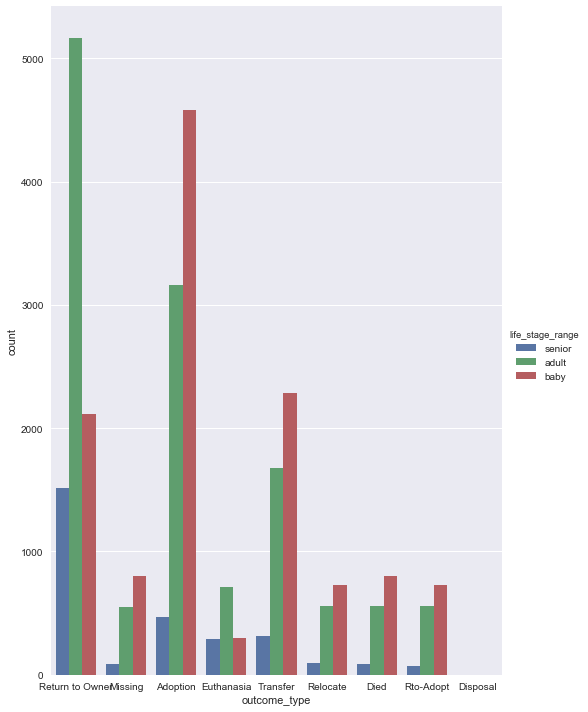

In [21]:
sns.factorplot(x="outcome_type", hue="life_stage_range", data=dogs, kind="count",
                    size=10, aspect=.7)

Breed variable has too many variable to extract so divides into mix category or Non Mix category and spliting using "\" and converting into simple breed.

In [22]:
def get_mix_breed(text):
    if "Mix" in text:
        return "IsMix"
    else:
        return "simple"
    

In [23]:
train_df["Mix_flag"] = train_df.breed.apply(get_mix_breed) 

In [24]:
train_df["breed"] = train_df.breed.apply(lambda x : re.sub("Mix" , "", x))
train_df["breed"] = train_df.breed.apply(lambda x : re.split("/" , x)[0])
train_df["color"] = train_df.color.apply(lambda x : re.split("/" , x)[0])

Weekday_outcome can be another important variable. So taking Saturday and Sunday as a Weekend and onther days as weekdays or working days.  

In [25]:
def get_weekend(text):
    if text in  ("Saturday" , "Sunday"):
        return "weekend"
    else:
        return "weekday"

In [26]:
train_df["weekday_flag"] = train_df.outcome_weekday.apply(lambda x: get_weekend(x))

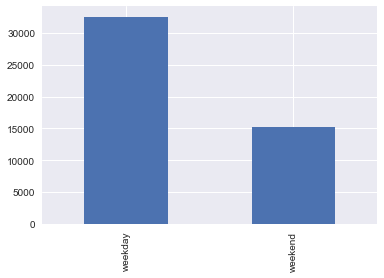

In [27]:
x = train_df.weekday_flag.value_counts()
x.plot(kind = "bar")

Time a pet was in welfare center is another important feature which equals to time pet has taken to recover. So it further categorize into 4 values.

In [28]:
def time_in_shelter(x):
    if x < (1) :
        return "less than a day"
    elif x>=(1) & x>(7):
        return "for a day or week"
    elif x >= (7) & x < (30.5):
        return "more than a week"
    else:
        return "more than month"
    

In [29]:
days_in_shelter = [int(i) for i in train_df.time_in_shelter_days]

In [30]:
time_in_shelter_animal= [time_in_shelter(i) for i in days_in_shelter]
train_df["time_in_shelter_animal"] = time_in_shelter_animal

Two more feature which is important part to predict outcome are condition and type of pet at time they enter in welfare center.  

In [31]:
train_df.intake_condition.value_counts()

Normal      41885
Injured      2417
Sick         1931
Nursing      1156
Aged          232
Other          97
Feral          61
Pregnant       24
Name: intake_condition, dtype: int64

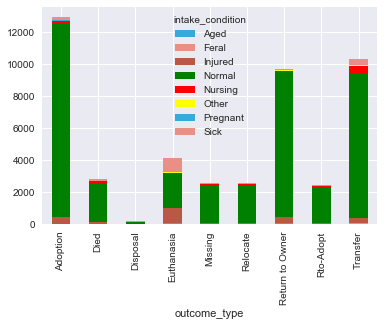

In [32]:
train_df[['intake_condition','outcome_type']].groupby(['outcome_type','intake_condition']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944',"Green", "Red","Yellow"],stacked=True)

In [33]:
train_df.intake_type.value_counts()

Stray                 33345
Owner Surrender        9110
Public Assist          3166
Wildlife               1947
Euthanasia Request      235
Name: intake_type, dtype: int64

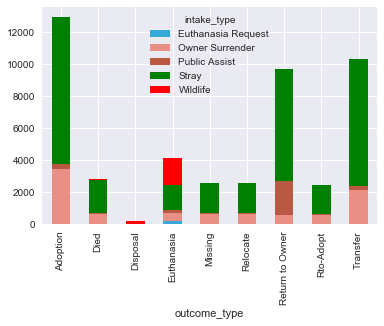

In [34]:
train_df[['intake_type','outcome_type']].groupby(['outcome_type','intake_type']).size().unstack().plot(kind='bar',color=['#34ABD8','#E98F85','#B95944',"Green", "Red", "Yellow"],stacked=True)

In [35]:
##Model Building 

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

C:\Users\123\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
# selecting features for predicting the outcome
train_df_features = train_df[['animal_type','sex_upon_outcome','age_upon_outcome','time_of_day',
                      'age_in_days', 'sex',"Neutered",
                      'life_stage_range','weekday_flag'
                      ,'color',"time_in_shelter_animal","outcome_type","Mix_flag","intake_condition","intake_type"]]

In [38]:
X_train_general = train_df_features[train_df_features['outcome_type']!='']
X_train = X_train_general.drop('outcome_type', axis = 1)
y_train = X_train_general.outcome_type

In [39]:
X_train_dm= pd.get_dummies(X_train)
y = y_train.astype('category').cat.codes

In [40]:
enc = OneHotEncoder(handle_unknown = 'ignore')
X = enc.fit(X_train_dm).transform(X_train_dm)

In [41]:
#spliting the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
X_train.shape,X_test.shape

((33462, 330), (14341, 330))

In [46]:
clf = DecisionTreeClassifier(max_depth=35)
clf1 = RandomForestClassifier(n_estimators=500)

In [43]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7612216842986074
0.469841712572345


In [ ]:
clf1.fit(X_train, y_train)
print(clf1.score(X_train, y_train))
print(clf1.score(X_test, y_test))

In [61]:
from sklearn.grid_search import GridSearchCV

C:\Users\123\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [62]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 400],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [63]:
CV_rfc.fit(X_train,y_train)
print(CV_rfc.score(X_train, y_train))
print(CV_rfc.score(X_test, y_test))

KeyboardInterrupt: 

In [141]:
pred_y = clf2.predict(X_train)

In [142]:
print(clf2.score(X_test, y_test))

0.49173697789554427


In [144]:
f1_score(y_train, pred_y, average='micro')

0.8660869045484431

In [152]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV

C:\Users\123\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\123\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import xgboost as xgb

In [3]:
clf = xgb.XGBClassifier()
parameters = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 9
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

NameError: name 'GridSearchCV' is not defined